In [4]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


In [ ]:



stocks = {
    "AAPL": pd.read_csv(r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\AAPL.csv"),
    "MSFT": pd.read_csv(r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\MSFT.csv"),
    "NVDA": pd.read_csv(r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\NVDA.csv"),
    "AMZN": pd.read_csv(r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\AMZN.csv"),
    "GOOG": pd.read_csv(r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\GOOG.csv"),
    "META": pd.read_csv(r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\META.csv")
}

# Ensure Date column is datetime
for ticker, df in stocks.items():
    df['Date'] = pd.to_datetime(df['Date'])


In [6]:
news_clean = pd.read_csv(r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\newsData\news_clean.csv")

news = news_clean.copy()
news['date_only'] = pd.to_datetime(news['date_only'])


Compute Sentiment

In [7]:
news['sentiment'] = news['headline'].apply(
    lambda x: TextBlob(str(x)).sentiment.polarity
)


Aggregate sentiment per day

In [8]:
daily_sentiment = (
    news.groupby('date_only')['sentiment']
         .mean()
         .reset_index()
         .rename(columns={'sentiment': 'avg_sentiment'})
)

Correlate with each stock

In [9]:
results = {}

for ticker, df in stocks.items():
    df['daily_return'] = df['Close'].pct_change()

    merged = pd.merge(
        df,
        daily_sentiment,
        left_on='Date',
        right_on='date_only',
        how='inner'
    )

    corr = merged['daily_return'].corr(merged['avg_sentiment'])
    results[ticker] = corr


Result 

In [10]:
print("Correlation between news sentiment and stock returns:\n")
for stock, corr in results.items():
    print(f"{stock}: {corr:.4f}")


Correlation between news sentiment and stock returns:

AAPL: 0.0439
MSFT: 0.0329
NVDA: -0.0264
AMZN: 0.0058
GOOG: 0.0173
META: 0.0816


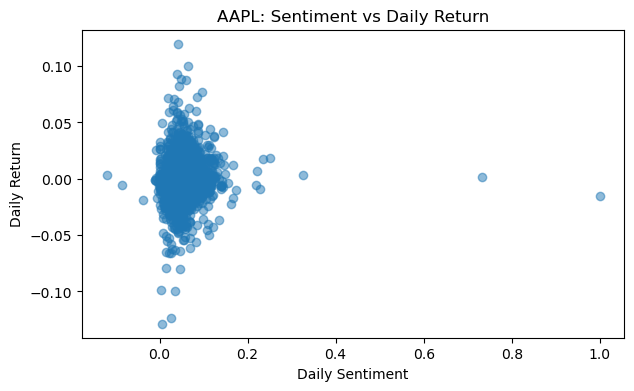

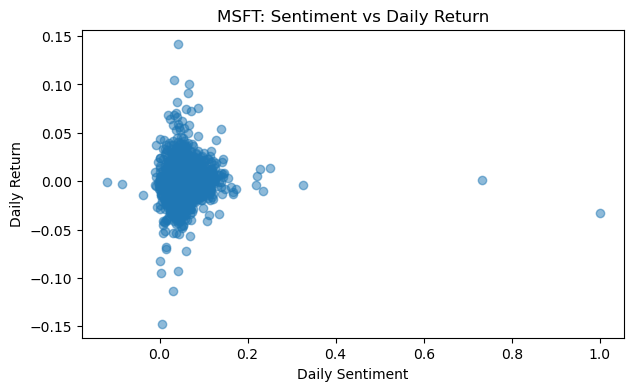

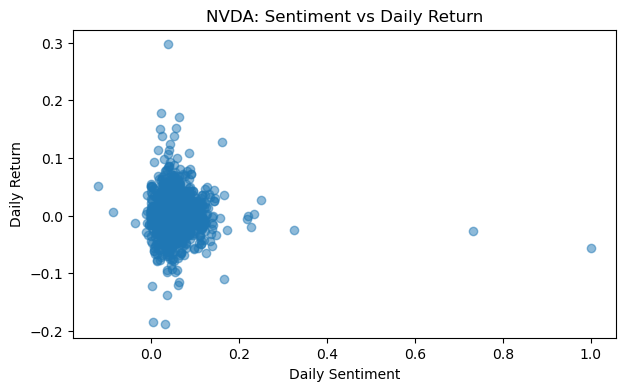

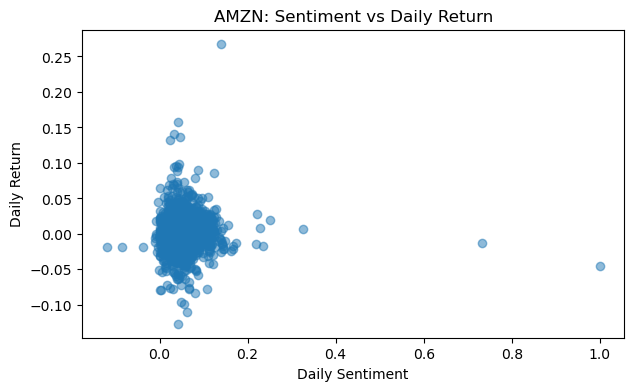

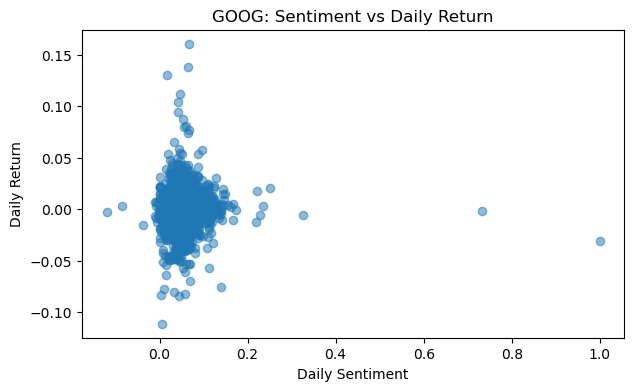

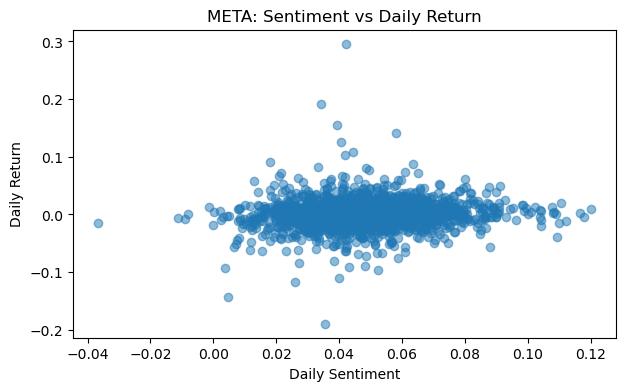

In [11]:
for ticker, df in stocks.items():
    df['daily_return'] = df['Close'].pct_change()
    merged = pd.merge(
        df,
        daily_sentiment,
        left_on='Date',
        right_on='date_only',
        how='inner'
    )
    
    plt.figure(figsize=(7,4))
    plt.scatter(merged['avg_sentiment'], merged['daily_return'], alpha=0.5)
    plt.title(f"{ticker}: Sentiment vs Daily Return")
    plt.xlabel("Daily Sentiment")
    plt.ylabel("Daily Return")
    plt.show()
